In [1]:
import numpy as np
import math
import glob
import sys
import sklearn 

import matplotlib.pyplot as plt

import HigherTierFileHelper

In [2]:
###########################################################
# Define mode
###########################################################
isTrackMode = False

In [3]:
###########################################################
# Define file
###########################################################

file = 'ccnutree_0'
fileNames = glob.glob('/Users/isobel/Desktop/DUNE/2024/Hierarchy/HigherTier/files/' + file + '.root')

if (isTrackMode) :    
    trainVarFile = '/Users/isobel/Desktop/DUNE/2024/Hierarchy/HigherTier/files/' + file + '_track_noPrimaries.npz'
else :
    trainVarFile = '/Users/isobel/Desktop/DUNE/2024/Hierarchy/HigherTier/files/' + file + '_shower_noPrimaries.npz'

print(fileNames)

['/Users/isobel/Desktop/DUNE/2024/Hierarchy/HigherTier/files/ccnutree_0.root']


In [4]:
###########################################################
# Read tree
###########################################################
#nLinks, variables, y, nLinksMade, signal_nLinksMade = HigherTierFileHelper.readTree(fileNames)
if (isTrackMode) : 
    nLinks, variables, y, trueParentChildLink, isLinkOrientationCorrect = HigherTierFileHelper.readTreeGroupLinks_track(fileNames)
else :
    nLinks, variables, y, trueParentChildLink, isLinkOrientationCorrect = HigherTierFileHelper.readTreeGroupLinks_shower(fileNames)

Reading tree:  /Users/isobel/Desktop/DUNE/2024/Hierarchy/HigherTier/files/ccnutree_0.root , This may take a while...
We have  249003  to train on!


In [5]:
# 0 - parentTrackScore
# 1 - parentNuVertexSeparation
# 2 - childNuVertexSeparation
# 3 - separation3D
# 4 - pidLinkType
# 5 - trackShowerLinkType

# 6, 23, 40, 57 parentEndRegionNHits
# 7, 24, 41, 58 parentEndRegionNParticles,
# 8, 25, 42, 59 parentEndRegionRToWall
# 9, 26, 43, 60 vertexSeparation
# 10, 27, 44, 61 doesChildConnect
# 11, 28, 45, 62 overshootStartDCA
# 12, 29, 46, 63 overshootStartL
# 13, 30, 47, 64 overshootEndDCA
# 14, 31, 48, 65 overshootEndL
# 15, 32, 49, 66 childConnectionDCA
# 16, 33, 50, 67 childConnectionExtrapDistance
# 17, 34, 51, 68 childConnectionLRatio
# 18, 35, 52, 69 parentConnectionPointNUpstreamHits
# 19, 36, 53, 70 parentConnectionPointNDownstreamHits
# 20, 37, 54, 71 parentConnectionPointNHitRatio
# 21, 38, 55, 72 parentConnectionPointEigenValueRatio
# 22, 39, 56, 73 parentConnectionPointOpeningAngle

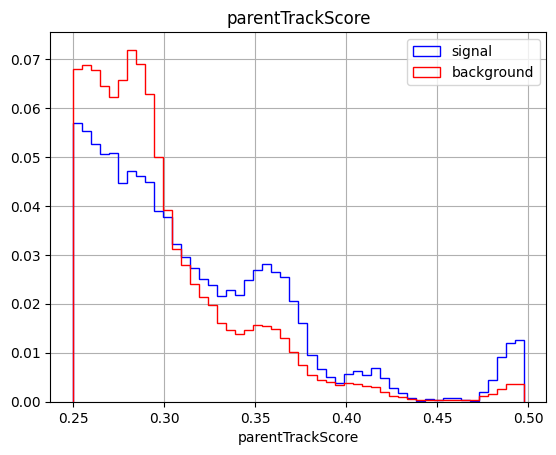

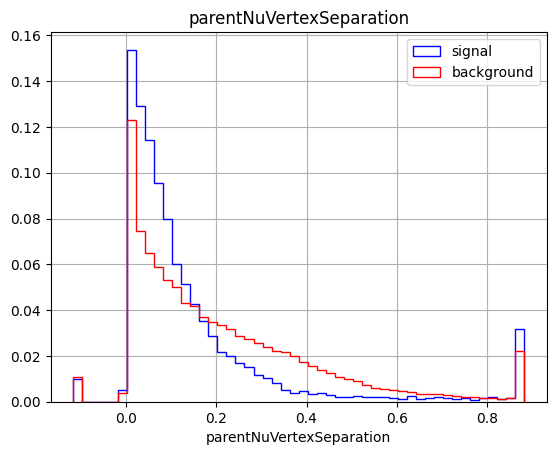

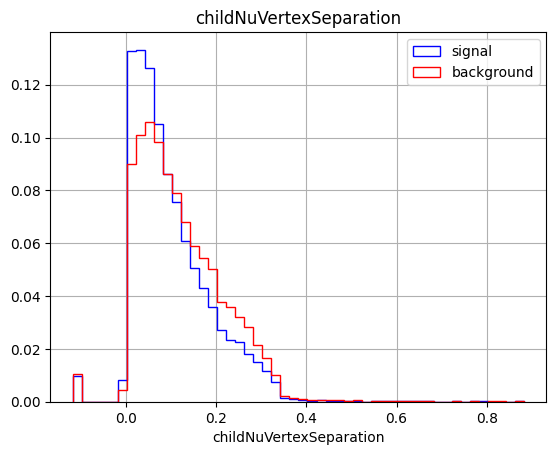

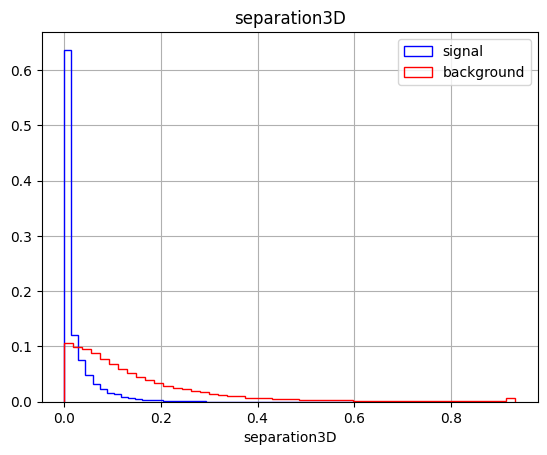

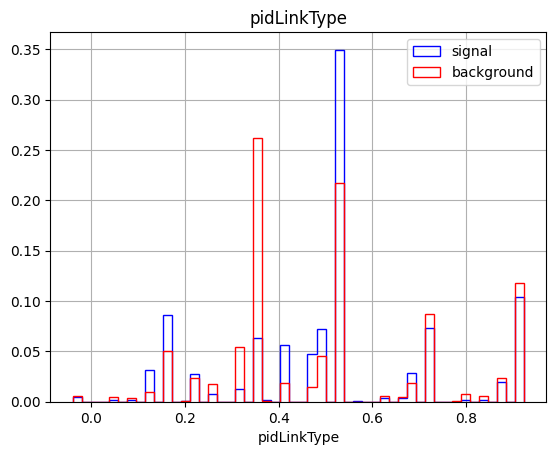

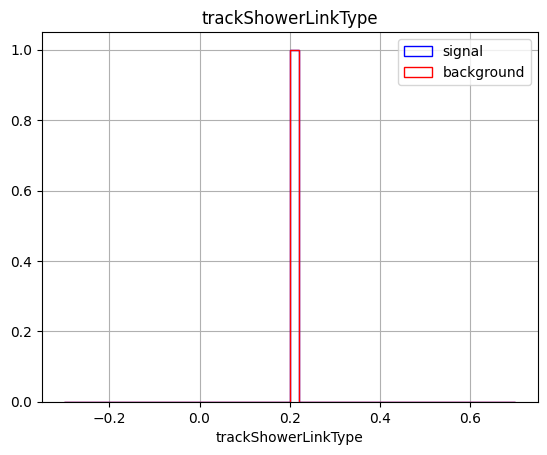

(249003,)


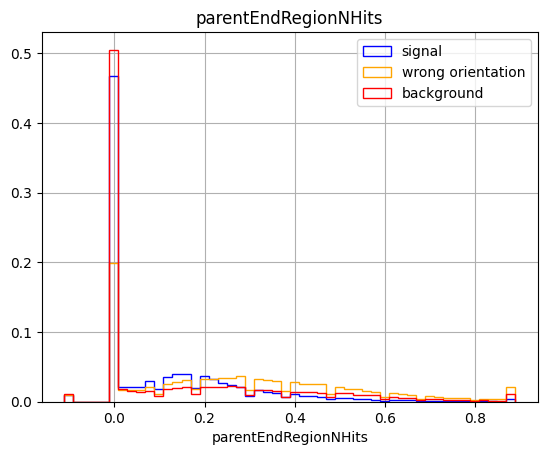

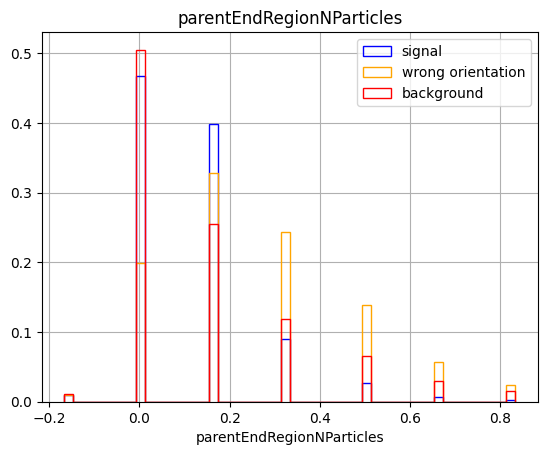

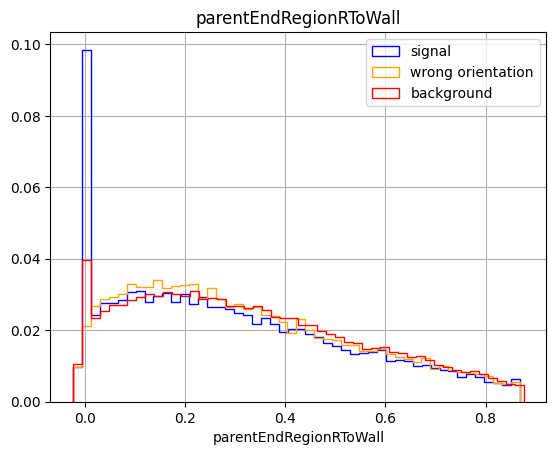

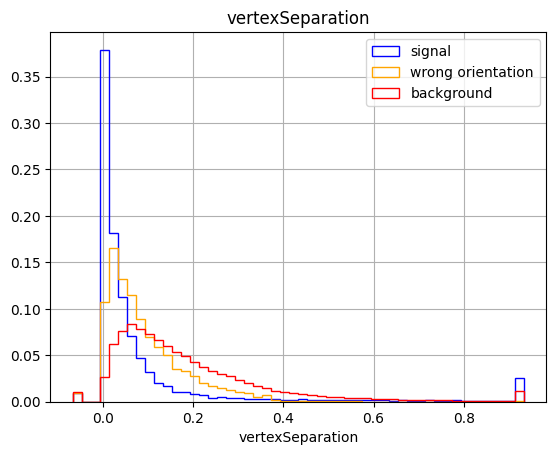

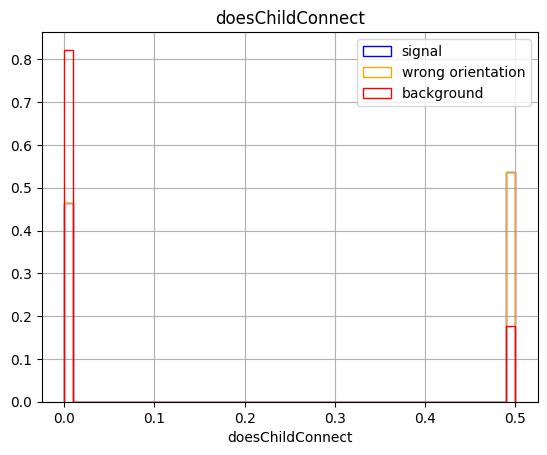

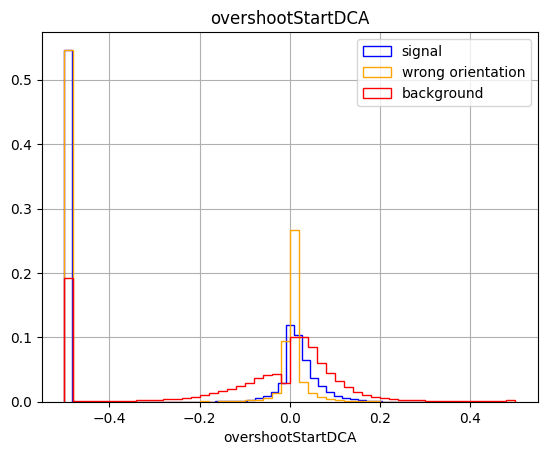

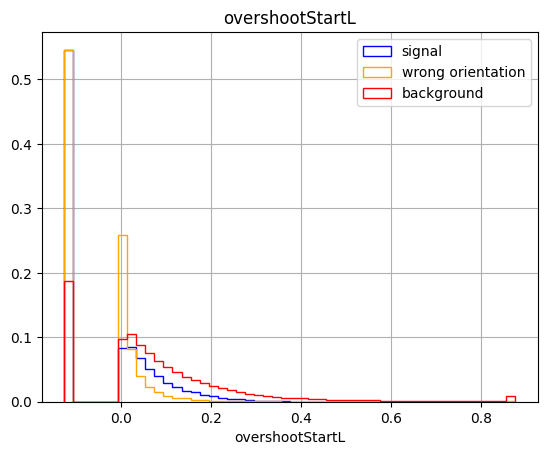

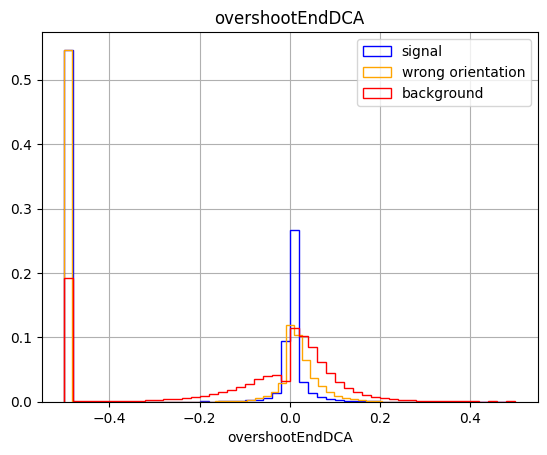

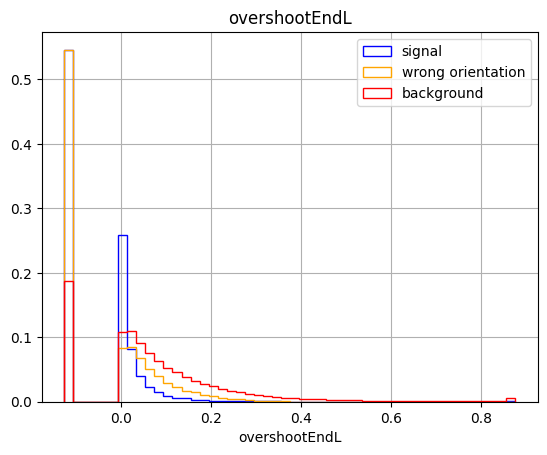

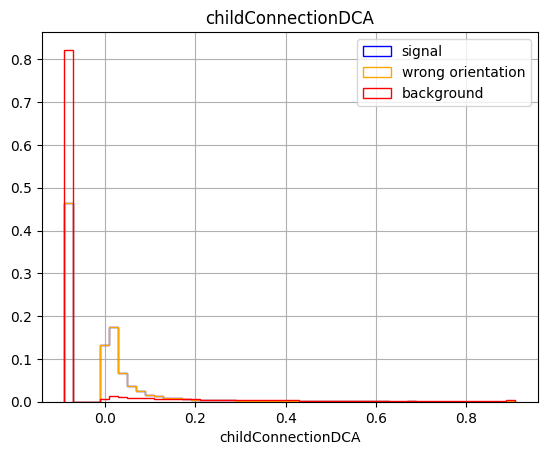

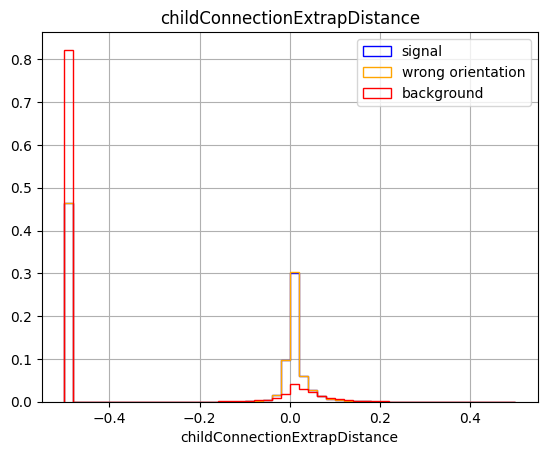

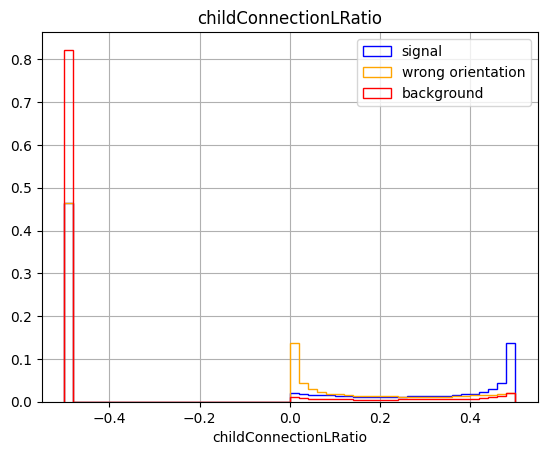

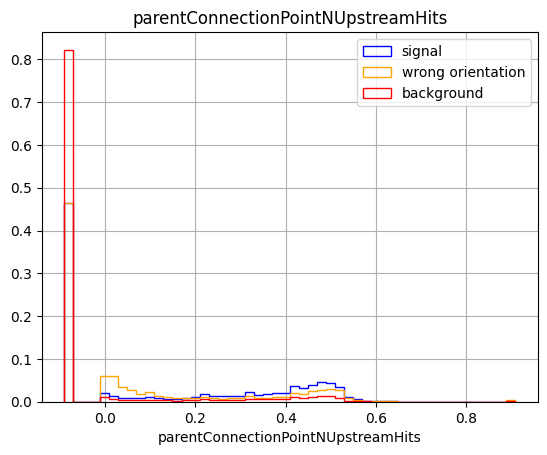

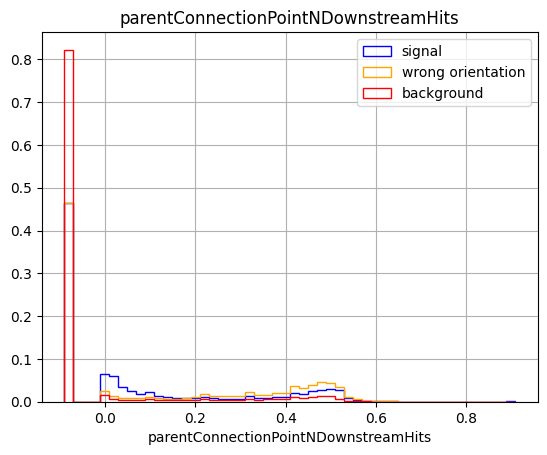

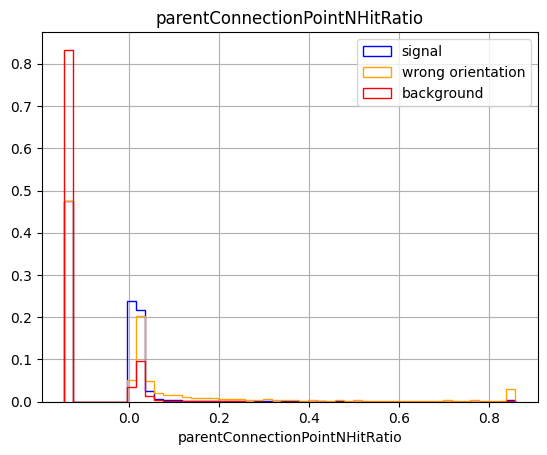

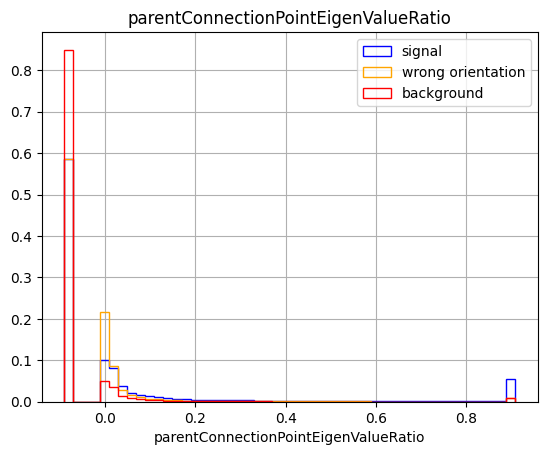

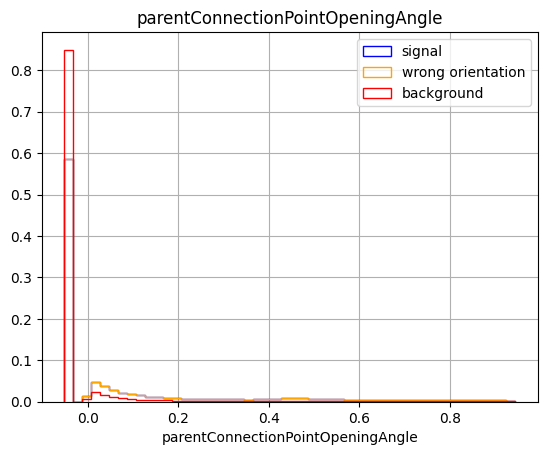

In [6]:
def drawSignalBackgroundGroup_track(variable0, variable1, variable2, variable3, truth_link_orientation, truth_is_correct, graph_label) :
    
    signal_mask_0 = np.logical_and((truth_link_orientation[:,0] == 1), truth_is_correct).reshape(-1)
    signal_mask_1 = np.logical_and((truth_link_orientation[:,1] == 1), truth_is_correct).reshape(-1)
    signal_mask_2 = np.logical_and((truth_link_orientation[:,2] == 1), truth_is_correct).reshape(-1)
    signal_mask_3 = np.logical_and((truth_link_orientation[:,3] == 1), truth_is_correct).reshape(-1)
    wo_mask_0 = np.logical_and((truth_link_orientation[:,0] == 0), truth_is_correct).reshape(-1)
    wo_mask_1 = np.logical_and((truth_link_orientation[:,1] == 0), truth_is_correct).reshape(-1)
    wo_mask_2 = np.logical_and((truth_link_orientation[:,2] == 0), truth_is_correct).reshape(-1)
    wo_mask_3 = np.logical_and((truth_link_orientation[:,3] == 0), truth_is_correct).reshape(-1)
    background_mask = (truth_is_correct == 0).reshape(-1)
    
    variable_signal_0 = variable0[signal_mask_0].reshape(-1)
    variable_signal_1 = variable1[signal_mask_1].reshape(-1)
    variable_signal_2 = variable2[signal_mask_2].reshape(-1)
    variable_signal_3 = variable3[signal_mask_3].reshape(-1)
    variable_wo_0 = variable0[wo_mask_0].reshape(-1)
    variable_wo_1 = variable1[wo_mask_1].reshape(-1)
    variable_wo_2 = variable2[wo_mask_2].reshape(-1)
    variable_wo_3 = variable3[wo_mask_3].reshape(-1)
    variable_background_0 = variable0[background_mask].reshape(-1)
    variable_background_1 = variable0[background_mask].reshape(-1)
    variable_background_2 = variable0[background_mask].reshape(-1)
    variable_background_3 = variable0[background_mask].reshape(-1)
    
    variable_signal = np.concatenate((variable_signal_0, variable_signal_1, variable_signal_2, variable_signal_3))
    variable_wo = np.concatenate((variable_wo_0, variable_wo_1, variable_wo_2, variable_wo_3))
    variable_background = np.concatenate((variable_background_0, variable_background_1, variable_background_2, variable_background_3))

    signal_weights = 1.0 / float(variable_signal.shape[0])
    signal_weights = np.ones(variable_signal.shape[0]) * signal_weights
    
    wo_weights = 1.0 / float(variable_wo.shape[0])
    wo_weights = np.ones(variable_wo.shape[0]) * wo_weights
    
    background_weights = 1.0 / float(variable_background.shape[0])
    background_weights = np.ones(variable_background.shape[0]) * background_weights  
        
    plt.hist(variable_signal, bins=50, color='blue', weights=signal_weights, label='signal', fill=False, histtype='step')
    plt.hist(variable_wo, bins=50, color='orange', weights=wo_weights, label='wrong orientation', fill=False, histtype='step')
    plt.hist(variable_background, bins=50, color='red', weights=background_weights, label='background', fill=False, histtype='step')
    plt.title(graph_label)
    plt.xlabel(graph_label)
    plt.legend()
    plt.grid(True)
    plt.show()   
    
def drawSignalBackgroundGroup_shower(variable0, variable1, truth_link_orientation, truth_is_correct, graph_label) :
    
    signal_mask_0 = np.logical_and((truth_link_orientation[:,0] == 1), truth_is_correct).reshape(-1)
    signal_mask_1 = np.logical_and((truth_link_orientation[:,1] == 1), truth_is_correct).reshape(-1)
    wo_mask_0 = np.logical_and((truth_link_orientation[:,0] == 0), truth_is_correct).reshape(-1)
    wo_mask_1 = np.logical_and((truth_link_orientation[:,1] == 0), truth_is_correct).reshape(-1)
    background_mask = (truth_is_correct == 0).reshape(-1)
    
    variable_signal_0 = variable0[signal_mask_0].reshape(-1)
    variable_signal_1 = variable1[signal_mask_1].reshape(-1)
    variable_wo_0 = variable0[wo_mask_0].reshape(-1)
    variable_wo_1 = variable1[wo_mask_1].reshape(-1)
    variable_background_0 = variable0[background_mask].reshape(-1)
    variable_background_1 = variable0[background_mask].reshape(-1)
    
    variable_signal = np.concatenate((variable_signal_0, variable_signal_1))
    variable_wo = np.concatenate((variable_wo_0, variable_wo_1))
    variable_background = np.concatenate((variable_background_0, variable_background_1))

    signal_weights = 1.0 / float(variable_signal.shape[0])
    signal_weights = np.ones(variable_signal.shape[0]) * signal_weights
    
    wo_weights = 1.0 / float(variable_wo.shape[0])
    wo_weights = np.ones(variable_wo.shape[0]) * wo_weights
    
    background_weights = 1.0 / float(variable_background.shape[0])
    background_weights = np.ones(variable_background.shape[0]) * background_weights  
        
    plt.hist(variable_signal, bins=50, color='blue', weights=signal_weights, label='signal', fill=False, histtype='step')
    plt.hist(variable_wo, bins=50, color='orange', weights=wo_weights, label='wrong orientation', fill=False, histtype='step')
    plt.hist(variable_background, bins=50, color='red', weights=background_weights, label='background', fill=False, histtype='step')
    plt.title(graph_label)
    plt.xlabel(graph_label)
    plt.legend()
    plt.grid(True)
    plt.show()  
    
def drawSignalBackground(variable, truth_labels, graph_label) :
    
    signal_mask_vis = (truth_labels == 1).reshape(-1)
    background_mask_vis = (truth_labels == 0).reshape(-1)

    variable_signal = variable[signal_mask_vis].reshape(-1)
    variable_background = variable[background_mask_vis].reshape(-1)

    signal_weights = 1.0 / float(variable_signal.shape[0])
    signal_weights = np.ones(variable_signal.shape[0]) * signal_weights
    
    background_weights = 1.0 / float(variable_background.shape[0])
    background_weights = np.ones(variable_background.shape[0]) * background_weights   
        
    plt.hist(variable_signal, bins=50, color='blue', weights=signal_weights, label='signal', fill=False, histtype='step')
    plt.hist(variable_background, bins=50, color='red', weights=background_weights, label='background', fill=False, histtype='step')
    plt.title(graph_label)
    plt.xlabel(graph_label)
    plt.legend()
    plt.grid(True)
    plt.show()   
    
drawSignalBackground(variables[:, 0], trueParentChildLink, "parentTrackScore")
drawSignalBackground(variables[:, 1], trueParentChildLink, "parentNuVertexSeparation")
drawSignalBackground(variables[:, 2], trueParentChildLink, "childNuVertexSeparation")
drawSignalBackground(variables[:, 3], trueParentChildLink, "separation3D")
drawSignalBackground(variables[:, 4], trueParentChildLink, "pidLinkType")
drawSignalBackground(variables[:, 5], trueParentChildLink, "trackShowerLinkType")

print(variables[:, 6].shape)

if (isTrackMode) :  
    drawSignalBackgroundGroup_track(variables[:, 6], variables[:, 23], variables[:, 40], variables[:, 57], isLinkOrientationCorrect, trueParentChildLink, 'parentEndRegionNHits')
    drawSignalBackgroundGroup_track(variables[:, 7], variables[:, 24], variables[:, 41], variables[:, 58], isLinkOrientationCorrect, trueParentChildLink, 'parentEndRegionNParticles')
    drawSignalBackgroundGroup_track(variables[:, 8], variables[:, 25], variables[:, 42], variables[:, 59], isLinkOrientationCorrect, trueParentChildLink, 'parentEndRegionRToWall')
    drawSignalBackgroundGroup_track(variables[:, 9], variables[:, 26], variables[:, 43], variables[:, 60], isLinkOrientationCorrect, trueParentChildLink, 'vertexSeparation')
    drawSignalBackgroundGroup_track(variables[:, 10], variables[:, 27], variables[:, 44], variables[:, 61], isLinkOrientationCorrect, trueParentChildLink, 'doesChildConnect')
    drawSignalBackgroundGroup_track(variables[:, 11], variables[:, 28], variables[:, 45], variables[:, 62], isLinkOrientationCorrect, trueParentChildLink, 'overshootStartDCA')
    drawSignalBackgroundGroup_track(variables[:, 12], variables[:, 29], variables[:, 46], variables[:, 63], isLinkOrientationCorrect, trueParentChildLink, 'overshootStartL')
    drawSignalBackgroundGroup_track(variables[:, 13], variables[:, 30], variables[:, 47], variables[:, 64], isLinkOrientationCorrect, trueParentChildLink, 'overshootEndDCA')
    drawSignalBackgroundGroup_track(variables[:, 14], variables[:, 31], variables[:, 48], variables[:, 65], isLinkOrientationCorrect, trueParentChildLink, 'overshootEndL')
    drawSignalBackgroundGroup_track(variables[:, 15], variables[:, 32], variables[:, 49], variables[:, 66], isLinkOrientationCorrect, trueParentChildLink, 'childConnectionDCA')
    drawSignalBackgroundGroup_track(variables[:, 16], variables[:, 33], variables[:, 50], variables[:, 67], isLinkOrientationCorrect, trueParentChildLink, 'childConnectionExtrapDistance')
    drawSignalBackgroundGroup_track(variables[:, 17], variables[:, 34], variables[:, 51], variables[:, 68], isLinkOrientationCorrect, trueParentChildLink, 'childConnectionLRatio')
    drawSignalBackgroundGroup_track(variables[:, 18], variables[:, 35], variables[:, 52], variables[:, 69], isLinkOrientationCorrect, trueParentChildLink, 'parentConnectionPointNUpstreamHits')
    drawSignalBackgroundGroup_track(variables[:, 19], variables[:, 36], variables[:, 53], variables[:, 70], isLinkOrientationCorrect, trueParentChildLink, 'parentConnectionPointNDownstreamHits')
    drawSignalBackgroundGroup_track(variables[:, 20], variables[:, 37], variables[:, 54], variables[:, 71], isLinkOrientationCorrect, trueParentChildLink, 'parentConnectionPointNHitRatio')
    drawSignalBackgroundGroup_track(variables[:, 21], variables[:, 38], variables[:, 55], variables[:, 72], isLinkOrientationCorrect, trueParentChildLink, 'parentConnectionPointEigenValueRatio')
    drawSignalBackgroundGroup_track(variables[:, 22], variables[:, 39], variables[:, 56], variables[:, 73], isLinkOrientationCorrect, trueParentChildLink, 'parentConnectionPointOpeningAngle')
else :
    drawSignalBackgroundGroup_shower(variables[:, 6], variables[:, 23], isLinkOrientationCorrect, trueParentChildLink, 'parentEndRegionNHits')
    drawSignalBackgroundGroup_shower(variables[:, 7], variables[:, 24], isLinkOrientationCorrect, trueParentChildLink, 'parentEndRegionNParticles')
    drawSignalBackgroundGroup_shower(variables[:, 8], variables[:, 25], isLinkOrientationCorrect, trueParentChildLink, 'parentEndRegionRToWall')
    drawSignalBackgroundGroup_shower(variables[:, 9], variables[:, 26], isLinkOrientationCorrect, trueParentChildLink, 'vertexSeparation')
    drawSignalBackgroundGroup_shower(variables[:, 10], variables[:, 27], isLinkOrientationCorrect, trueParentChildLink, 'doesChildConnect')
    drawSignalBackgroundGroup_shower(variables[:, 11], variables[:, 28], isLinkOrientationCorrect, trueParentChildLink, 'overshootStartDCA')
    drawSignalBackgroundGroup_shower(variables[:, 12], variables[:, 29], isLinkOrientationCorrect, trueParentChildLink, 'overshootStartL')
    drawSignalBackgroundGroup_shower(variables[:, 13], variables[:, 30], isLinkOrientationCorrect, trueParentChildLink, 'overshootEndDCA')
    drawSignalBackgroundGroup_shower(variables[:, 14], variables[:, 31], isLinkOrientationCorrect, trueParentChildLink, 'overshootEndL')
    drawSignalBackgroundGroup_shower(variables[:, 15], variables[:, 32], isLinkOrientationCorrect, trueParentChildLink, 'childConnectionDCA')
    drawSignalBackgroundGroup_shower(variables[:, 16], variables[:, 33], isLinkOrientationCorrect, trueParentChildLink, 'childConnectionExtrapDistance')
    drawSignalBackgroundGroup_shower(variables[:, 17], variables[:, 34], isLinkOrientationCorrect, trueParentChildLink, 'childConnectionLRatio')
    drawSignalBackgroundGroup_shower(variables[:, 18], variables[:, 35], isLinkOrientationCorrect, trueParentChildLink, 'parentConnectionPointNUpstreamHits')
    drawSignalBackgroundGroup_shower(variables[:, 19], variables[:, 36], isLinkOrientationCorrect, trueParentChildLink, 'parentConnectionPointNDownstreamHits')
    drawSignalBackgroundGroup_shower(variables[:, 20], variables[:, 37], isLinkOrientationCorrect, trueParentChildLink, 'parentConnectionPointNHitRatio')
    drawSignalBackgroundGroup_shower(variables[:, 21], variables[:, 38], isLinkOrientationCorrect, trueParentChildLink, 'parentConnectionPointEigenValueRatio')
    drawSignalBackgroundGroup_shower(variables[:, 22], variables[:, 39], isLinkOrientationCorrect, trueParentChildLink, 'parentConnectionPointOpeningAngle')

In [7]:
###########################################################
# This should shuffle things so that the indicies are still linked
###########################################################
variables, y, trueParentChildLink = sklearn.utils.shuffle(variables, y, trueParentChildLink)

In [8]:
###########################################################
# Write file
###########################################################

ntest = math.floor(nLinks * 0.1)
ntrain = math.floor(nLinks * 0.9)

print('ntest: ', ntest)
print('ntrain: ', ntrain)
    
variables_train = variables[:ntrain]
variables_test = variables[ntrain:(ntrain + ntest)]

y_train = y[:ntrain]
y_test = y[ntrain:(ntrain + ntest)]

trueParentChildLink_train = trueParentChildLink[:ntrain]
trueParentChildLink_test = trueParentChildLink[ntrain:(ntrain + ntest)]
    
np.savez(trainVarFile, variables_train=variables_train, y_train=y_train, trueParentChildLink_train=trueParentChildLink_train, variables_test=variables_test, y_test=y_test, trueParentChildLink_test=trueParentChildLink_test)

ntest:  24900
ntrain:  224102


In [9]:
print('variables_train: ', variables_train.shape)    
print('variables_test: ', variables_test.shape)  

print('y_train: ', y_train.shape)    
print('y_test: ', y_test.shape)  

variables_train:  (224102, 40)
variables_test:  (24900, 40)
y_train:  (224102, 2)
y_test:  (24900, 2)
